# EEE486 - Assignment 2 Part 1

In [1]:
%%capture
!pip install datasets transformers
!apt install git-lfs

# Fine-tuning a model on a text classification task

In [3]:
GLUE_TASKS = ["cola", "mnli", "mnli-mm", "mrpc", "qnli", "qqp", "rte", "sst2", "stsb", "wnli"]

In [4]:
task = "rte"
model_checkpoint = "bert-base-uncased"
batch_size = 32

## Loading the dataset

In [ ]:
#from datasets import load_dataset, load_metric

from datasets import load_dataset
!pip install evaluate
from evaluate import load

In [ ]:
actual_task = "mnli" if task == "mnli-mm" else task
print(f"Task is: {actual_task} ")
dataset = load_dataset("glue", actual_task)

!pip install scikit-learn
metric = load("accuracy")

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [8]:
dataset["train"][0]

{'sentence1': 'No Weapons of Mass Destruction Found in Iraq Yet.',
 'sentence2': 'Weapons of Mass Destruction Found in Iraq.',
 'label': 1,
 'idx': 0}

In [9]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [10]:
show_random_elements(dataset["train"])

,sentence1,sentence2,label,idx
0,"The borrowers must form five-member groups that, along with the bank's field workers, closely supervise the loans. Peer pressure substitutes for collateral because the group's first two borrowers have to start repaying the principal plus interest over a six-week period before the other members can take out loans. The interest rate is fixed at 16 percent.",The first two borrowers must start repaying the principal plus interest over a six-week period.,entailment,300
1,"Los Angeles Mayor James Hahn, along with top members of the Automobile Club of Southern California, along with will announce the kickoff of a $9 billion plan to fund Los Angeles County's Top Ten Traffic Busters.",James Hahn is a member of the Automobile Club of Southern California.,not_entailment,608
2,"As the U.S. military evacuated Saigon in the Spring of 1975, President Gerald Ford approved Operation Babylift, the plan to transport thousands of Vietnamese children to adoptive parents in the West, hundreds of them at a time, before the U.S. was forced out of the country.",The U.S. military evacuated U.S. citizens.,not_entailment,1707
3,"Jyestadeva (1500-1610), was an astronomer of the Kerala school founded by Madhava of Sangamagrama and a student of Damodara. He is most known for writing the first calculus text, the Yuktibhasa . He also authored the Drk-karana on astronomical observations.",Jyestadeva invented calculus.,not_entailment,1544
4,"A statement issued by Royal Moroccan Airlines, a copy of which was received by Agence France Presse today, said that the company decided to start two flights a week between Casablanca and Gaza as soon as the Palestinian airport is opened there.","With the opening of the Palestinian airport, Royal Moroccan Airlines will fly between Casablanca and Gaza.",entailment,2012
5,"The American House of Representatives is due to vote today, on a resolution submitted by the Chairman of the Judicial Committee, Henry Hyde, asking Congress to launch an investigation over charges brought forward by Independent Prosecutor-General Kenneth Star against President Clinton in the Monica Lewinsky affair.","Voting will take place in the American House of Representatives today, on the President Clinton-Monica Lewinsky scandal.",entailment,1587
6,"The 38-year-old actress recently appeared in a court case against Jack Jordan, a man who was found guilty of stalking her. The friend added: ""Everyone is so happy for Uma after what she went through with that stalker. Arki is a guy who can take care of her. ""Uma is hoping this time, it's really love. Everyone wants the best for her. And Arki is a really sweet guy."" Uma was previously married to actor Gary Oldman, while Arpad has two children with Australian supermodel Elle Macpherson.",Uma Thurman is engaged to Arpad Busson.,not_entailment,427
7,"The settlement must be approved by Citigroup's board of directors and the board of Regents of the University of California, the lead plaintiff for investors in the case.",The University of California's board of Regents still needs to ratify the settlement - as does Citigroup's board of directors.,entailment,2097
8,The city continued to grow through much of the 20th century.,"The city continued to grow, but its services deteriorated.",not_entailment,2108
9,"""The rapidly mixed brigades of former enemies have been sent to the front lines with no salaries, rations, or any formal training, increasing the likelihood of future human rights violations,"" Human Rights Watch said in a statement. Among the former rebels integrated into the regular army are Bosco Ntaganda, who was recently promoted to the position of general. He is wanted on an arrest warrant by the International Criminal Court for enlisting child soldiers and is accused of commanding the rebel troops that massacred 150 villagers in the town of Kiwanja last November.",Bosco Ntaganda is a general.,entailment,664


In [11]:
import numpy as np

fake_preds = np.random.randint(0, 2, size=(64,))
fake_labels = np.random.randint(0, 2, size=(64,))
metric.compute(predictions=fake_preds, references=fake_labels)

{'accuracy': 0.515625}

## Preprocessing the data

In [12]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
tokenizer("Hello, this one sentence!", max_length=50, padding="max_length", truncation=True)

{'input_ids': [101, 7592, 1010, 2023, 2028, 6251, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [14]:
tokenizer("Hello, this one sentence!")

{'input_ids': [101, 7592, 1010, 2023, 2028, 6251, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [15]:
tokenizer("Hello, this one sentence!","What is going on here!")

{'input_ids': [101, 7592, 1010, 2023, 2028, 6251, 999, 102, 2054, 2003, 2183, 2006, 2182, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [16]:
task_to_keys = {
    "cola": ("sentence", None),
    "mnli": ("premise", "hypothesis"),
    "mnli-mm": ("premise", "hypothesis"),
    "mrpc": ("sentence1", "sentence2"),
    "qnli": ("question", "sentence"),
    "qqp": ("question1", "question2"),
    "rte": ("sentence1", "sentence2"),
    "sst2": ("sentence", None),
    "stsb": ("sentence1", "sentence2"),
    "wnli": ("sentence1", "sentence2"),
}

In [17]:
dataset['train'][0]

{'sentence1': 'No Weapons of Mass Destruction Found in Iraq Yet.',
 'sentence2': 'Weapons of Mass Destruction Found in Iraq.',
 'label': 1,
 'idx': 0}

In [18]:
sentence1_key, sentence2_key = task_to_keys[task]
if sentence2_key is None:
    print(f"Sentence: {dataset['train'][0][sentence1_key]}")
else:
    print(f"Sentence 1: {dataset['train'][0][sentence1_key]}")
    print(f"Sentence 2: {dataset['train'][0][sentence2_key]}")

Sentence 1: No Weapons of Mass Destruction Found in Iraq Yet.
Sentence 2: Weapons of Mass Destruction Found in Iraq.


In [19]:
def preprocess_function(examples):
    if sentence2_key is None:
        return tokenizer(examples[sentence1_key], truncation=True)
    return tokenizer(examples[sentence1_key], examples[sentence2_key], truncation=True)

In [20]:
preprocess_function(dataset['train'][:1])


{'input_ids': [[101, 2053, 4255, 1997, 3742, 6215, 2179, 1999, 5712, 2664, 1012, 102, 4255, 1997, 3742, 6215, 2179, 1999, 5712, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [21]:
encoded_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2490 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

## Fine-tuning the model

In [22]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3000
    })
})

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from transformers import logging

logging.set_verbosity_error() #Since we learn the meaning of warning, we can silence it.

num_labels = 3 if task.startswith("mnli") else 1 if task=="stsb" else 2

model_checkpoint = "bert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)
model.dropout.p = 0.4


In [24]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [25]:
metric_name = "pearson" if task == "stsb" else "matthews_correlation" if task == "cola" else "accuracy"
model_name = model_checkpoint.split("/")[-1]
run_no="3"
args = TrainingArguments(
    f"{model_name}-finetuned-{task}-run_{run_no}",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=2,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    # push_to_hub=True,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [26]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if task != "stsb":
        predictions = np.argmax(predictions, axis=1)
    else:
        predictions = predictions[:, 0]
    return metric.compute(predictions=predictions, references=labels)

In [27]:
validation_key = "validation_mismatched" if task == "mnli-mm" else "validation_matched" if task == "mnli" else "validation"
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset[validation_key],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

<ipython-input-27-4d7a7b54288c>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [28]:
# Recall that we have CUDA device. Lets check the amount of memory.
!nvidia-smi

Mon Apr  7 15:11:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             53W /  400W |     895MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [29]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: irem-esendemir (irem-esendemir-bilkent-niversitesi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'eval_loss': 0.655742883682251, 'eval_accuracy': 0.6245487364620939, 'eval_runtime': 0.6484, 'eval_samples_per_second': 427.187, 'eval_steps_per_second': 13.88, 'epoch': 1.0}
{'eval_loss': 0.6631781458854675, 'eval_accuracy': 0.6137184115523465, 'eval_runtime': 0.6332, 'eval_samples_per_second': 437.475, 'eval_steps_per_second': 14.214, 'epoch': 2.0}
{'train_runtime': 62.5051, 'train_samples_per_second': 79.674, 'train_steps_per_second': 2.496, 'train_loss': 0.6602027599628155, 'epoch': 2.0}


TrainOutput(global_step=156, training_loss=0.6602027599628155, metrics={'train_runtime': 62.5051, 'train_samples_per_second': 79.674, 'train_steps_per_second': 2.496, 'train_loss': 0.6602027599628155, 'epoch': 2.0})

We can check with the `evaluate` method that our `Trainer` did reload the best model properly (if it was not the last one):

In [30]:
trainer.evaluate()

{'eval_loss': 0.655742883682251, 'eval_accuracy': 0.6245487364620939, 'eval_runtime': 0.6687, 'eval_samples_per_second': 414.22, 'eval_steps_per_second': 13.458, 'epoch': 2.0}


{'eval_loss': 0.655742883682251,
 'eval_accuracy': 0.6245487364620939,
 'eval_runtime': 0.6687,
 'eval_samples_per_second': 414.22,
 'eval_steps_per_second': 13.458,
 'epoch': 2.0}

In [31]:
%%capture
# trainer.push_to_hub()

In [32]:
from transformers import AutoModelForSequenceClassification


## Hyperparameter search

In [33]:
%%capture
! pip install optuna
# ! pip install ray[tune]

In [34]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)



In [35]:
trainer = Trainer(
    model_init=model_init,
    args=args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset[validation_key],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

<ipython-input-35-900d107e0d38>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [36]:
import optuna

def my_hp_space(trial: optuna.trial.Trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-6, 2e-5, log=True),
        "num_train_epochs": trial.suggest_categorical("num_train_epochs", [1, 2, 3, 4, 5]),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [64]),
        "dropout_rate": trial.suggest_float("dropout_rate", 0.0, 0.4, step=0.1),
        "max_length": trial.suggest_categorical("max_length", [8, 16, 24, 48, 64])
   }

In [ ]:
# best_run = trainer.hyperparameter_search(hp_space = my_hp_space, backend = "optuna", n_trials=10, direction="maximize")

[I 2025-04-07 15:12:43,102] A new study created in memory with name: no-name-f6035f6f-f852-491d-a1fa-8a62b9ef62ff


eval/accuracy,█▁█
eval/loss,▁█▁
eval/runtime,▄▁█
eval/samples_per_second,▅█▁
eval/steps_per_second,▅█▁
train/epoch,▁███
train/global_step,▁███
eval/accuracy,0.62455
eval/loss,0.65574
eval/runtime,0.6687
eval/samples_per_second,414.22


{'eval_loss': 0.6942868828773499, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.6395, 'eval_samples_per_second': 433.174, 'eval_steps_per_second': 14.074, 'epoch': 1.0}
{'train_runtime': 21.5517, 'train_samples_per_second': 115.536, 'train_steps_per_second': 1.81, 'train_loss': 0.7050072596623347, 'epoch': 1.0}


[I 2025-04-07 15:13:06,017] Trial 0 finished with value: 0.4729241877256318 and parameters: {'learning_rate': 1.434497361407749e-05, 'num_train_epochs': 1, 'per_device_train_batch_size': 64, 'dropout_rate': 0.1, 'max_length': 8}. Best is trial 0 with value: 0.4729241877256318.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▁
train/global_step,▁▁
eval/accuracy,0.47292
eval/loss,0.69429
eval/runtime,0.6395
eval/samples_per_second,433.174


{'eval_loss': 0.696447491645813, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.6377, 'eval_samples_per_second': 434.355, 'eval_steps_per_second': 14.113, 'epoch': 1.0}
{'train_runtime': 21.3409, 'train_samples_per_second': 116.677, 'train_steps_per_second': 1.827, 'train_loss': 0.7062570131742038, 'epoch': 1.0}


[I 2025-04-07 15:13:28,786] Trial 1 finished with value: 0.4729241877256318 and parameters: {'learning_rate': 1.2853757701803536e-05, 'num_train_epochs': 1, 'per_device_train_batch_size': 64, 'dropout_rate': 0.2, 'max_length': 48}. Best is trial 0 with value: 0.4729241877256318.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▁
train/global_step,▁▁
eval/accuracy,0.47292
eval/loss,0.69645
eval/runtime,0.6377
eval/samples_per_second,434.355


{'eval_loss': 0.7058828473091125, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.6366, 'eval_samples_per_second': 435.123, 'eval_steps_per_second': 14.138, 'epoch': 1.0}
{'eval_loss': 0.6950299739837646, 'eval_accuracy': 0.47653429602888087, 'eval_runtime': 0.6359, 'eval_samples_per_second': 435.597, 'eval_steps_per_second': 14.153, 'epoch': 2.0}
{'eval_loss': 0.6908300518989563, 'eval_accuracy': 0.51985559566787, 'eval_runtime': 0.6345, 'eval_samples_per_second': 436.563, 'eval_steps_per_second': 14.184, 'epoch': 3.0}
{'eval_loss': 0.6876674890518188, 'eval_accuracy': 0.5667870036101083, 'eval_runtime': 0.6377, 'eval_samples_per_second': 434.401, 'eval_steps_per_second': 14.114, 'epoch': 4.0}
{'eval_loss': 0.6866827607154846, 'eval_accuracy': 0.5703971119133574, 'eval_runtime': 0.6338, 'eval_samples_per_second': 437.044, 'eval_steps_per_second': 14.2, 'epoch': 5.0}
{'train_runtime': 100.4455, 'train_samples_per_second': 123.948, 'train_steps_per_second': 1.941, 'train_loss': 0

[I 2025-04-07 15:15:10,628] Trial 2 finished with value: 0.5703971119133574 and parameters: {'learning_rate': 3.969118782484249e-06, 'num_train_epochs': 5, 'per_device_train_batch_size': 64, 'dropout_rate': 0.30000000000000004, 'max_length': 64}. Best is trial 2 with value: 0.5703971119133574.


eval/accuracy,▁▁▄██
eval/loss,█▄▃▁▁
eval/runtime,▆▅▂█▁
eval/samples_per_second,▃▄▇▁█
eval/steps_per_second,▃▄▇▁█
train/epoch,▁▃▅▆██
train/global_step,▁▃▅▆██
eval/accuracy,0.5704
eval/loss,0.68668
eval/runtime,0.6338
eval/samples_per_second,437.044


{'eval_loss': 0.6979374289512634, 'eval_accuracy': 0.4693140794223827, 'eval_runtime': 0.6339, 'eval_samples_per_second': 436.95, 'eval_steps_per_second': 14.197, 'epoch': 1.0}
{'eval_loss': 0.6706474423408508, 'eval_accuracy': 0.5812274368231047, 'eval_runtime': 0.6363, 'eval_samples_per_second': 435.306, 'eval_steps_per_second': 14.144, 'epoch': 2.0}
{'eval_loss': 0.6620416045188904, 'eval_accuracy': 0.6064981949458483, 'eval_runtime': 0.6375, 'eval_samples_per_second': 434.492, 'eval_steps_per_second': 14.117, 'epoch': 3.0}
{'train_runtime': 60.8644, 'train_samples_per_second': 122.732, 'train_steps_per_second': 1.922, 'train_loss': 0.6699988862388154, 'epoch': 3.0}


[I 2025-04-07 15:16:12,929] Trial 3 finished with value: 0.6064981949458483 and parameters: {'learning_rate': 1.84502610791064e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 64, 'dropout_rate': 0.1, 'max_length': 16}. Best is trial 3 with value: 0.6064981949458483.


eval/accuracy,▁▇█
eval/loss,█▃▁
eval/runtime,▁▆█
eval/samples_per_second,█▃▁
eval/steps_per_second,█▃▁
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.6065
eval/loss,0.66204
eval/runtime,0.6375
eval/samples_per_second,434.492


{'eval_loss': 0.69549161195755, 'eval_accuracy': 0.4981949458483754, 'eval_runtime': 0.6348, 'eval_samples_per_second': 436.342, 'eval_steps_per_second': 14.177, 'epoch': 1.0}
{'eval_loss': 0.6788784861564636, 'eval_accuracy': 0.5703971119133574, 'eval_runtime': 0.6334, 'eval_samples_per_second': 437.323, 'eval_steps_per_second': 14.209, 'epoch': 2.0}
{'train_runtime': 45.9193, 'train_samples_per_second': 108.451, 'train_steps_per_second': 1.699, 'train_loss': 0.6933544843624799, 'epoch': 2.0}


[I 2025-04-07 15:17:00,299] Trial 4 finished with value: 0.5703971119133574 and parameters: {'learning_rate': 1.8826739468377277e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 64, 'dropout_rate': 0.0, 'max_length': 16}. Best is trial 3 with value: 0.6064981949458483.


eval/accuracy,▁█
eval/loss,█▁
eval/runtime,█▁
eval/samples_per_second,▁█
eval/steps_per_second,▁█
train/epoch,▁██
train/global_step,▁██
eval/accuracy,0.5704
eval/loss,0.67888
eval/runtime,0.6334
eval/samples_per_second,437.323


{'eval_loss': 0.6997994184494019, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.633, 'eval_samples_per_second': 437.597, 'eval_steps_per_second': 14.218, 'epoch': 1.0}
{'train_runtime': 25.7538, 'train_samples_per_second': 96.685, 'train_steps_per_second': 1.514, 'train_loss': 0.7081113962026743, 'epoch': 1.0}


[I 2025-04-07 15:17:27,464] Trial 5 finished with value: 0.4729241877256318 and parameters: {'learning_rate': 1.0881361853343879e-05, 'num_train_epochs': 1, 'per_device_train_batch_size': 64, 'dropout_rate': 0.30000000000000004, 'max_length': 8}. Best is trial 3 with value: 0.6064981949458483.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▁
train/global_step,▁▁
eval/accuracy,0.47292
eval/loss,0.6998
eval/runtime,0.633
eval/samples_per_second,437.597


{'eval_loss': 0.7206099033355713, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.6387, 'eval_samples_per_second': 433.71, 'eval_steps_per_second': 14.092, 'epoch': 1.0}


[I 2025-04-07 15:18:11,789] Trial 6 pruned. 


{'eval_loss': 0.7143036127090454, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.6403, 'eval_samples_per_second': 432.604, 'eval_steps_per_second': 14.056, 'epoch': 2.0}


eval/accuracy,▁▁
eval/loss,█▁
eval/runtime,▁█
eval/samples_per_second,█▁
eval/steps_per_second,█▁
train/epoch,▁█
train/global_step,▁█
eval/accuracy,0.47292
eval/loss,0.7143
eval/runtime,0.6403
eval/samples_per_second,432.604


{'eval_loss': 0.690876841545105, 'eval_accuracy': 0.5415162454873647, 'eval_runtime': 0.6392, 'eval_samples_per_second': 433.341, 'eval_steps_per_second': 14.08, 'epoch': 1.0}
{'eval_loss': 0.6823745965957642, 'eval_accuracy': 0.592057761732852, 'eval_runtime': 0.6376, 'eval_samples_per_second': 434.44, 'eval_steps_per_second': 14.115, 'epoch': 2.0}
{'eval_loss': 0.6779670119285583, 'eval_accuracy': 0.5848375451263538, 'eval_runtime': 0.6399, 'eval_samples_per_second': 432.867, 'eval_steps_per_second': 14.064, 'epoch': 3.0}
{'train_runtime': 61.7147, 'train_samples_per_second': 121.041, 'train_steps_per_second': 1.896, 'train_loss': 0.691527342184996, 'epoch': 3.0}


[I 2025-04-07 15:19:14,895] Trial 7 finished with value: 0.5848375451263538 and parameters: {'learning_rate': 1.0866979005708887e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 64, 'dropout_rate': 0.2, 'max_length': 24}. Best is trial 3 with value: 0.6064981949458483.


eval/accuracy,▁█▇
eval/loss,█▃▁
eval/runtime,▆▁█
eval/samples_per_second,▃█▁
eval/steps_per_second,▃█▁
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.58484
eval/loss,0.67797
eval/runtime,0.6399
eval/samples_per_second,432.867


{'eval_loss': 0.7137085199356079, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.6342, 'eval_samples_per_second': 436.772, 'eval_steps_per_second': 14.191, 'epoch': 1.0}
{'train_runtime': 26.3228, 'train_samples_per_second': 94.595, 'train_steps_per_second': 1.482, 'train_loss': 0.7154094500419421, 'epoch': 1.0}


[I 2025-04-07 15:19:42,600] Trial 8 finished with value: 0.4729241877256318 and parameters: {'learning_rate': 4.870886465076087e-06, 'num_train_epochs': 1, 'per_device_train_batch_size': 64, 'dropout_rate': 0.1, 'max_length': 64}. Best is trial 3 with value: 0.6064981949458483.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▁
train/global_step,▁▁
eval/accuracy,0.47292
eval/loss,0.71371
eval/runtime,0.6342
eval/samples_per_second,436.772


{'eval_loss': 0.7126109600067139, 'eval_accuracy': 0.4729241877256318, 'eval_runtime': 0.6357, 'eval_samples_per_second': 435.719, 'eval_steps_per_second': 14.157, 'epoch': 1.0}


[I 2025-04-07 15:20:26,977] Trial 9 pruned. 


{'eval_loss': 0.7022250294685364, 'eval_accuracy': 0.4657039711191336, 'eval_runtime': 0.6354, 'eval_samples_per_second': 435.915, 'eval_steps_per_second': 14.163, 'epoch': 2.0}


In [38]:
best_run

BestRun(run_id='3', objective=0.6064981949458483, hyperparameters={'learning_rate': 1.84502610791064e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 64, 'dropout_rate': 0.1, 'max_length': 16}, run_summary=None)

In [39]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()


{'eval_loss': 0.6979257464408875, 'eval_accuracy': 0.4693140794223827, 'eval_runtime': 0.6364, 'eval_samples_per_second': 435.291, 'eval_steps_per_second': 14.143, 'epoch': 1.0}
{'eval_loss': 0.6707261204719543, 'eval_accuracy': 0.5848375451263538, 'eval_runtime': 0.634, 'eval_samples_per_second': 436.903, 'eval_steps_per_second': 14.195, 'epoch': 2.0}
{'eval_loss': 0.6625271439552307, 'eval_accuracy': 0.6173285198555957, 'eval_runtime': 0.6365, 'eval_samples_per_second': 435.196, 'eval_steps_per_second': 14.14, 'epoch': 3.0}
{'train_runtime': 60.2086, 'train_samples_per_second': 124.069, 'train_steps_per_second': 1.943, 'train_loss': 0.6699415679670807, 'epoch': 3.0}


TrainOutput(global_step=117, training_loss=0.6699415679670807, metrics={'train_runtime': 60.2086, 'train_samples_per_second': 124.069, 'train_steps_per_second': 1.943, 'train_loss': 0.6699415679670807, 'epoch': 3.0})

In [40]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.6625271439552307, 'eval_accuracy': 0.6173285198555957, 'eval_runtime': 0.6586, 'eval_samples_per_second': 420.602, 'eval_steps_per_second': 13.666, 'epoch': 3.0}
{'eval_loss': 0.6625271439552307, 'eval_accuracy': 0.6173285198555957, 'eval_runtime': 0.6586, 'eval_samples_per_second': 420.602, 'eval_steps_per_second': 13.666, 'epoch': 3.0}


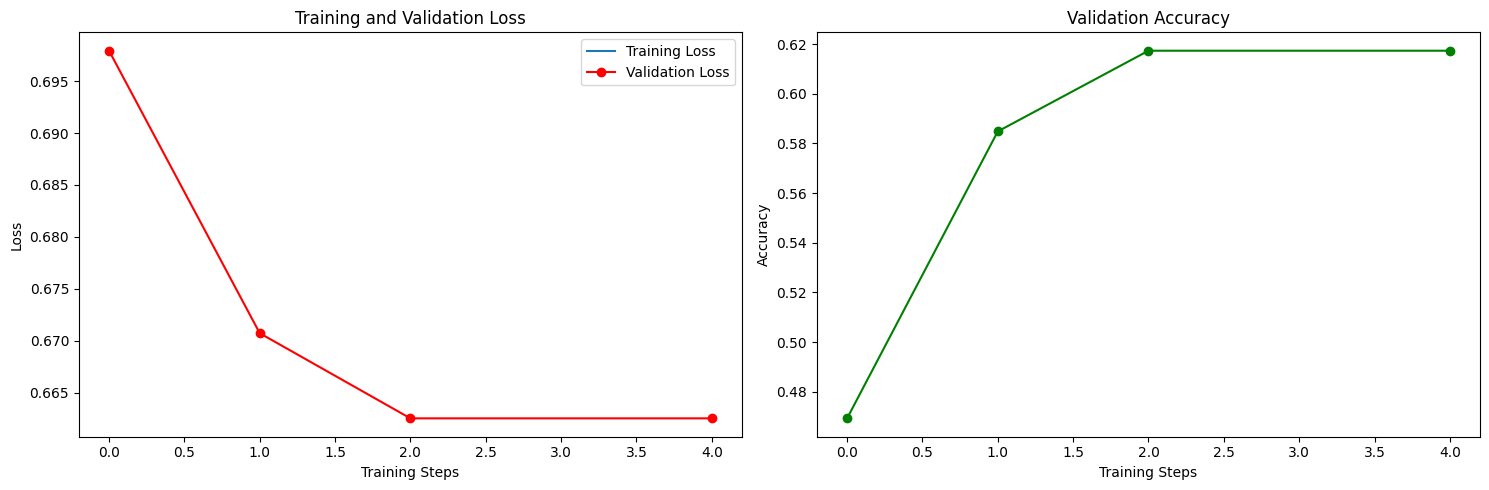

In [ ]:
import matplotlib.pyplot as plt
train_history = trainer.state.log_history

train_loss = [x["loss"] for x in train_history if "loss" in x and "eval_loss" not in x]
steps = list(range(len(train_loss)))

eval_steps = []
eval_loss = []
eval_accuracy = []

for i, log in enumerate(train_history):
    if "eval_loss" in log:
        eval_steps.append(i)
        eval_loss.append(log["eval_loss"])
        eval_accuracy.append(log["eval_accuracy"])

plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(steps, train_loss, label="Training Loss")
if eval_steps:
    plt.plot(eval_steps, eval_loss, 'ro-', label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
if eval_steps:
    plt.plot(eval_steps, eval_accuracy, 'go-')
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")

plt.tight_layout()
plt.savefig(f"{model_name}-finetuned-{task}-metrics.png")
plt.show()

In [42]:
# Save the model locally
trainer.save_model(f"{model_name}-finetuned-{task}-best")
print(f"Model saved to {model_name}-finetuned-{task}-best")

Model saved to bert-base-uncased-finetuned-rte-best


In [43]:
print("Best Hyperparameters:")
for param, value in best_run.hyperparameters.items():
    print(f"{param}: {value}")

print("\nFinal Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value}")

Best Hyperparameters:
learning_rate: 1.84502610791064e-05
num_train_epochs: 3
per_device_train_batch_size: 64
dropout_rate: 0.1
max_length: 16

Final Evaluation Results:
eval_loss: 0.6625271439552307
eval_accuracy: 0.6173285198555957
eval_runtime: 0.6586
eval_samples_per_second: 420.602
eval_steps_per_second: 13.666
epoch: 3.0


In [44]:
trainer.push_to_hub()

It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`huggingface-cli upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Upload 111 LFS files:   0%|          | 0/111 [00:00<?, ?it/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/876M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

events.out.tfevents.1744038694.f5bf72a4ec95.200.0:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

events.out.tfevents.1744038758.f5bf72a4ec95.200.1:   0%|          | 0.00/411 [00:00<?, ?B/s]

events.out.tfevents.1744038763.f5bf72a4ec95.200.2:   0%|          | 0.00/5.80k [00:00<?, ?B/s]

events.out.tfevents.1744038786.f5bf72a4ec95.200.3:   0%|          | 0.00/5.77k [00:00<?, ?B/s]

events.out.tfevents.1744038809.f5bf72a4ec95.200.4:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

events.out.tfevents.1744038911.f5bf72a4ec95.200.5:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

events.out.tfevents.1744038973.f5bf72a4ec95.200.6:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

events.out.tfevents.1744039020.f5bf72a4ec95.200.7:   0%|          | 0.00/5.77k [00:00<?, ?B/s]

events.out.tfevents.1744039048.f5bf72a4ec95.200.8:   0%|          | 0.00/5.74k [00:00<?, ?B/s]

events.out.tfevents.1744039092.f5bf72a4ec95.200.9:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

events.out.tfevents.1744039155.f5bf72a4ec95.200.10:   0%|          | 0.00/5.77k [00:00<?, ?B/s]

events.out.tfevents.1744039183.f5bf72a4ec95.200.11:   0%|          | 0.00/5.74k [00:00<?, ?B/s]

events.out.tfevents.1744039227.f5bf72a4ec95.200.12:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

events.out.tfevents.1744039288.f5bf72a4ec95.200.13:   0%|          | 0.00/405 [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/iremEsendemir/bert-base-uncased-finetuned-rte-run_3/commit/abd1d9ac12a2e2b58870ddf80e94ddc6aad20cac', commit_message='End of training', commit_description='', oid='abd1d9ac12a2e2b58870ddf80e94ddc6aad20cac', pr_url=None, repo_url=RepoUrl('https://huggingface.co/iremEsendemir/bert-base-uncased-finetuned-rte-run_3', endpoint='https://huggingface.co', repo_type='model', repo_id='iremEsendemir/bert-base-uncased-finetuned-rte-run_3'), pr_revision=None, pr_num=None)